In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import hypertools as hyp
import matplotlib.pyplot as plt

%matplotlib inline

In [297]:
# imports dataset and displays first five rows
allstars = pd.read_csv('allstar_team_talent.csv')
allstars.head()

,yearID,gameNum,gameID,lgID,tm_OFF_talent,tm_DEF_talent,tm_PIT_talent,MLB_avg_RPG,talent_RSPG,talent_RAPG,unadj_PYTH,timeline_adj,SOS,adj_PYTH,no_1_player,no_2_player
0,1966,0,NLS196607120,NL,1.332265,0.130991,0.720508,3.99,5.322265,3.138501,0.724426,0.860664,0.430332,0.665082,mayswi01,santoro01
1,1986,0,NLS198607150,AL,1.049056,0.356240,0.677431,4.41,5.459056,3.376329,0.706675,0.917536,0.458768,0.671282,higuete01,clemero02
2,1934,0,NLS193407100,AL,1.778661,0.116654,0.627669,4.91,6.688661,4.165678,0.704031,0.769668,0.384834,0.598084,hardeme01,foxxji01
3,1941,0,ALS194107080,AL,1.472107,0.090803,0.616915,4.49,5.962107,3.782282,0.696952,0.789573,0.394787,0.600030,dimagjo01,willite01
4,1940,0,NLS194007090,AL,1.356557,0.138973,0.673328,4.68,6.036557,3.867698,0.693104,0.786730,0.393365,0.594230,dimagjo01,newsobo01


In [298]:
# drops irrelevant columns
allstars.drop(['gameNum', 'gameID', 'unadj_PYTH', 'SOS', 'no_1_player', 'no_2_player'], inplace=True, axis=1)

# renames columns into readable format
columns = {'yearID': 'Year',
           'lgID': 'League',
           'tm_OFF_talent': 'Offensive Talent', 
           'tm_DEF_talent': 'Defensive Talent', 
           'tm_PIT_talent': 'Pitching Talent', 
           'MLB_avg_RPG': 'MLB Avg. Runs Scored',
           'talent_RSPG': 'Expected Runs Scored', 
           'talent_RAPG': 'Expected Runs Allowed', 
           'timeline_adj': 'League Quality Relative to 2015', 
           'adj_PYTH': 'Pythagorean Talent Rating'}
allstars.rename(columns, inplace=True, axis=1)

# sorts dataframe using year and league indices, and fills nan values with 0
allstars.set_index(['Year', 'League'], inplace=True)
allstars.sort_index(inplace=True)
allstars.fillna(0)

# displays first five rows of cleaned data
allstars.head()

Offensive Talent  Defensive Talent  Pitching Talent  \
Year League                                                        
1933 AL              1.291067          0.131162         0.453936   
     NL              0.853086         -0.060718         0.491377   
1934 AL              1.778661          0.116654         0.627669   
     NL              0.768908          0.028509         0.560984   
1935 AL              1.303554          0.128962         0.540452   

             MLB Avg. Runs Scored  Expected Runs Scored  \
Year League                                               
1933 AL                      4.48              5.771067   
     NL                      4.48              5.333086   
1934 AL                      4.91              6.688661   
     NL                      4.91              5.678908   
1935 AL                      4.90              6.203554   

             Expected Runs Allowed  League Quality Relative to 2015  \
Year League                                                           
1933 AL                   3.894902                         0.766825   
     NL                   4.049341                         0.766825   
1934 AL                   4.165678                         0.769668   
     NL                   4.320506                         0.769668   
1935 AL                   4.230587                         0.772512   

             Pythagorean Talent Rating  
Year League                             
1933 AL                       0.560809  
     NL                       0.507212  
1934 AL                       0.598084  
     NL                       0.507804  
1935 AL                       0.559076

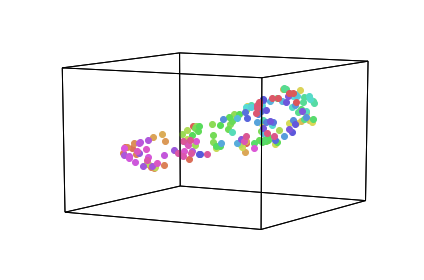

In [299]:
# hypertools data plot
hyp.plot(allstars, 'o', hue=np.array(allstars.index), reduce='UMAP')

In [300]:
# creates array of values in dataset
as_values = allstars.values
as_values

array([[ 1.29106745,  0.13116207,  0.45393638, ...,  3.89490155,
         0.76682465,  0.56080893],
       [ 0.85308606, -0.06071802,  0.49137691, ...,  4.0493411 ,
         0.76682465,  0.50721158],
       [ 1.77866132,  0.1166537 ,  0.6276686 , ...,  4.1656777 ,
         0.76966825,  0.59808424],
       ...,
       [ 0.9642164 ,  0.10546605,  0.41296975, ...,  3.55156421,
         0.9971564 ,  0.65311149],
       [ 0.73736864,  0.19884627,  0.40237015, ...,  3.49878358,
         1.        ,  0.6440162 ],
       [ 0.93150172,  0.27275952,  0.4409722 , ...,  3.38626828,
         1.        ,  0.67363272]])

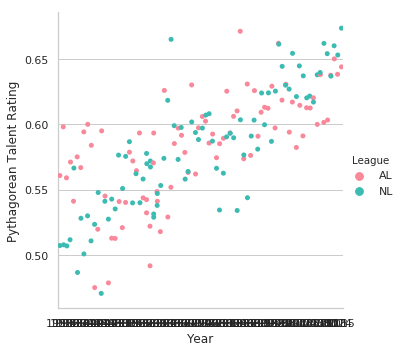

In [310]:
# scatter plot of talent rating between the AL and NL over the years
sns.catplot(x='Year', y='Pythagorean Talent Rating', hue='League', data=allstars.reset_index())


### Summary

I have always enjoyed FiveThirtyEight's data visualization and analysis methods in sports, particularly baseball. With Jay's guidance I found an interesting dataset about MLB All-Star games on their GitHub page. This dataset summarized talent ratings for each league's All-Star teams over about 80 seasons.

After cleaning up the data, I visualized it using hypertools and UMAP dimension reduction. It is hard to pinpoint exactly what is shown, but similar hues clustered together indicates there is some pattern in the data.

Then, I generated a scatterplot of FiveThirtyEight's talent rating over the years, with colors representing teams from each league (AL and NL). There is a clear pattern showing that as the seasons have progressed, All-Star teams have been getting better.